<a href="https://colab.research.google.com/github/MiguelAngel-ht/PyTorch-Examples/blob/main/03Nb-Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Logistic Regression

In [2]:
# importing libraries
import torch
import torchvision    # pytorch for computer vision 
from torchvision.datasets import MNIST

# to delete output in google colab
from google.colab import output

In [3]:
# download training data
data = MNIST(root = 'data/', 
             download = True)
output.clear()

In [4]:
# amount of data
len(data)

60000

In [5]:
# get test data 
test = MNIST(root = 'data/',
             train = False)
len(test)

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


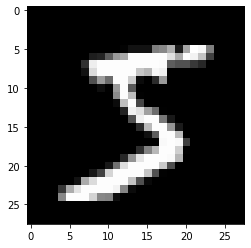

In [7]:
img, label = data[0]
plt.imshow(img, cmap='gray')
print('Label:', label)

We are going to change data to tensor variables.

In [8]:
import torchvision.transforms as transforms

In [10]:
# download data
data = MNIST(root = 'data/',
             train = True,
             transform = transforms.ToTensor())

In [11]:
# split to images and labels
img, label = data[0]
print(img.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
# select a region of image and get max and min
print(img[:, 10:15, 10:15])
print(torch.max(img), torch.min(img))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


Where 0 is black color and 1 is white color.

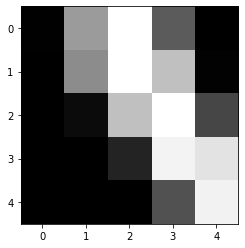

In [15]:
plt.imshow(img[0,10:15,10:15], 'gray')
plt.show()

## **Training and Validation**



1.   **Training set:** compute the loss and adjust the weights of the model using gradient descent.
2.   **Validation set:** adjust hyperparameters (for example: lr) and pick the best version of the model.
3. **Test set:** used to compare different models or types of modelling approaches and report the final accuracy of the model.



In [16]:
import numpy as np

def split_indices(n, val_pct):
  """
      args:
              n -  number of values       (int)
              val_pct - percent to take   (float)
      return: 
              training set      (array of indices) 
              validation  set   (array of indices)
  """
  # determine size of validation set
  n_val = int(val_pct * n)

  # create random permutation of 0 to n-1
  idxs = np.random.permutation(n)

  # pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val] 

In [17]:
train_i, val_i = split_indices(n = len(data),
                               val_pct = 0.2)

In [19]:
print(len(train_i), len(val_i))
print('Sample val indices:', val_i[:10])

48000 12000
Sample val indices: [14503 16726 23011 29386 21832 45576 23621 20885 18873 36998]


In [20]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [21]:
batch_size = 100

# training sampler and data loader
train_sampler = SubsetRandomSampler(train_i)
train_loader = DataLoader(data,
                          batch_size,
                          sampler=train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_i)
val_loader = DataLoader(data,
                          batch_size,
                          sampler=val_sampler)


## **Model**



*   **Logistic regression** is almost identical to linear regression model `( pred = x @ w.t() + b )`
*   We just use `nn.Linear` to create the model instead of defining and initializing the matrices manually.
*   The output is a vector of sie 10, with every probability of particular target label (0-9). 


 

In [22]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [23]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0087, -0.0078,  0.0137,  ..., -0.0073,  0.0349,  0.0324],
        [-0.0207, -0.0009,  0.0055,  ...,  0.0095, -0.0174,  0.0259],
        [-0.0292, -0.0182, -0.0179,  ...,  0.0045, -0.0091, -0.0327],
        ...,
        [-0.0039, -0.0319, -0.0060,  ..., -0.0020,  0.0160,  0.0239],
        [ 0.0300,  0.0216,  0.0220,  ..., -0.0019,  0.0086,  0.0258],
        [ 0.0167,  0.0172, -0.0289,  ...,  0.0128, -0.0254,  0.0092]],
       requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0110, -0.0052, -0.0108, -0.0248,  0.0265,  0.0087,  0.0087,  0.0330,
        -0.0136,  0.0088], requires_grad=True)

In [26]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([5, 1, 6, 7, 7, 6, 9, 0, 2, 6, 1, 8, 6, 1, 1, 3, 1, 2, 0, 8, 4, 6, 1, 9,
        6, 9, 5, 3, 0, 0, 3, 1, 9, 6, 6, 1, 4, 9, 1, 4, 0, 4, 4, 4, 9, 2, 4, 0,
        3, 8, 9, 1, 3, 0, 2, 4, 6, 4, 9, 6, 4, 6, 0, 5, 4, 4, 6, 5, 3, 2, 9, 8,
        1, 9, 7, 9, 1, 8, 4, 2, 7, 4, 8, 9, 6, 8, 3, 5, 2, 2, 4, 1, 8, 1, 7, 9,
        6, 3, 7, 2])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

This error y because we have a shape 1x20x20 but we need a vector of size 784.

In [27]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel() 